# MISURAZIONE g

In [4]:
T1,sigmaT1 = 2.0026, 1.4138 # interpolazione formula T*
T2,sigmaT2 = 2.0022, 0.096 # valori raccolti formula T*
T3,sigmaT3 = 2.0026, 0.1196 # risoluzione sistema 1
T4,sigmaT4 = 2.0026, 0.0245 # risoluzione sistema 2

T5,sigmaT5 = 2.0026, 0.0024 # propagazione corretta con derivate parziali
T6,sigmaT6 = 2.0026, 0.013 # interpolazione propagata con derivate parziali

In [5]:
import numpy as np
from interpolazione3 import final_val
D = 0.994

def g_T(T,sT):
    g = 4* np.pi**2 * D / T**2
    sg = g*2*sT/T
    return g,sg

print('g1: ',final_val(*g_T(T1,sigmaT1),decimals=3,udm='m s^{-2}'))
print('g2: ',final_val(*g_T(T2,sigmaT2),decimals=3,udm='m s^{-2}'))
print('g3: ',final_val(*g_T(T3,sigmaT3),decimals=3,udm='m s^{-2}'))
print('g4: ',final_val(*g_T(T4,sigmaT4),decimals=3,udm='m s^{-2}'))
print('g5: ',final_val(*g_T(T5,sigmaT5),decimals=4,udm='m s^{-2}'))

g1:  9.785 ± 13.816 m s^{-2}
g2:  9.789 ± 0.939 m s^{-2}
g3:  9.785 ± 1.169 m s^{-2}
g4:  9.785 ± 0.239 m s^{-2}
g5:  9.7849 ± 0.0235 m s^{-2}


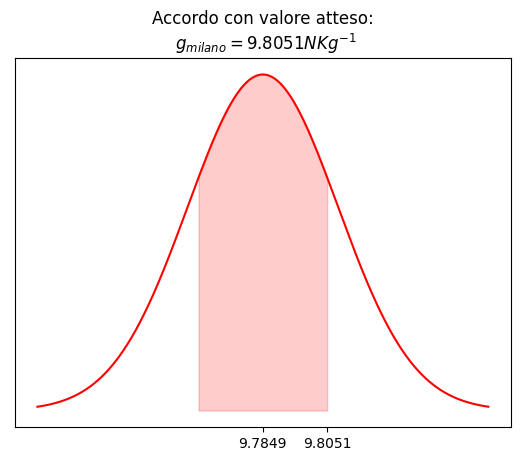

Accordo in percentuale:  38.9 % >> 5%


In [6]:
from interpolazione3 import probability_under_norm
import matplotlib.pyplot as plt
import scipy.stats as sc

g = 9.7849
sigmag = 0.0235
g_milano = 9.8051 # tabulata https://www.handelskammer.bz.it/it/servizi/regolazione-del-mercato/ufficio-metrico/metrologia-legale/titolari-strumenti/strumenti-pesare/zone-di-gravit%C3%A0-e-numero-divisioni

plt.title('Accordo con valore atteso:\n $g_{milano} = 9.8051 N Kg^{-1}$')
x = np.linspace(min(g-3*sigmag,g-3*sigmag),max(g+3*sigmag,g+3*sigmag),1000)
R = sc.norm.pdf(x,loc=g,scale=sigmag)
plt.plot(x,R, color='red', label='carrello rosso')
t = np.abs(g - g_milano) / sigmag

plt.fill_between(x= x,y1= R,where= (g - t*sigmag < x)&(x < g + t*sigmag),color= "red",alpha= 0.2)

plt.xticks([g,g_milano])
plt.yticks([])
plt.show()

p = (1-probability_under_norm(g,sigmag,g_milano))*100
print('Accordo in percentuale: ',p,'% >> 5%')